# Глава 20 Нейронные сети(МО Крис Элбон)

В самом центре нейронных сетей лежит структурно-функциональная единица, так называемый узел, или нейрон. 

Структурно-функциональная единица принимает один или несколько входов , умножает каждый вход на параметр, так называемый вес, суммирует взвешенные входные значения между собой с некоторым значением смещения(обычно 1), а затем передает значение в активационную функцию. 

Этот вывод затем направляется вперед к другим нейронам, расположенным глубже в нейронной сети(если они существуют).

Нейронные сети прямого распространения - так называемые многослойные персептроны - являются простейшей искусственной нейронной сетью, используемой в любых реальных условиях.

Нейронные сети могут быть визуализирваны как ряд связанных слоев, которые образуют сеть, соединяющую значения признаков наблюдения на одном конце и целевое значение (например, класс наблюдения) на другом конце.

Термин "прямое распространение" происходит из того факта, что значения признаков наблюдения передаютя по сети "вперед", при этом каждый слой последовательно преобразовывает значения признаков с целью, чтобы выходной результат в конце был таким же, как и целевое значение.

В частности, нейронные сети прямого распространения содержат 3 типа слоев структурно-функциональных единиц.

В начале нейронной сети находится входной слой, где каждая единица содержит значение наблюдения для одного признака.

Например, если наблюдение имеет 100 признаков, то входной слой имеет 100 узлов.

В конце нейронной сети находится выходной слой, который преобразует выходной результат скрытых слоев в значения, полезные для выполнения поставленной задачи.

Например, если бы нашей целью являлась бинарная классификация, то мы могли бы использовать выходной слой с единственной структурно-функциональной единицей, которая применяла бы сигмоидальную функцию для шкалирования собственного выходного результата в диапазон от 0 до 1., представляя предсказанную вероятность класса.

Между входным и выходным слоями находятся так называемые "скрытые" слои (которые в общем-то не скрыты.

Эти скрытые слои последовательно преобразуют значения признаков из входного слоя во что-то, что после обработки выходным слоем напоминает целевой класс.

Нейронные сети с многими скрытыми слоями (например, 10, 100, 1000) считаются "глубокими" сетями, и их применение называется глубоким самообучением.

Нейронные сети, как правило, создаются с параметрами, которые инициализируются как малые случайные значения из гауссового, или нормального, равномерного распределения.

Когда наблюдение(или чаще заданное количество наблюдений, называемое пакетом), подается через сеть, выводимое значение сравнивается с истинным значением наблюдения с помощью функции потери.

Этот процесс называется "прямым распространением". 

Затем алгоритм проходит через сеть "в обратную сторону", идентифицируя насколько большим был вклад каждого параметра  в ошибку между предсказаннымии истинными значениями.

Этот процесс называется "обратным распространением".

В каждом параметре оптимизационный алгоритм определяет, насколько каждый вес должен быть скорректирован для улучшения выходного результата.


Нейронные сети учатся, несколько раз повторяя этот процесс прямого распространения значений признаков и обратного распространения ошибки для каждого из наблюдений в тренировочных данных (каждый случай передачи всех наблюдений через сеть называется эпохой, и процесс тренировки сети обычно состоит из нескольких эпох), многократно обновляя значения параметров.

Здесь мы будем использовать Keras.  Это библиотека высокого уровня, в которой в качестве своего "движка", используются другие библиотеки, такие как TensorFlow и  Theano. 

Приемущество Keras состоит в том, что мы можем сосредоточиться на процессе проектирования и тренировки сети, оставив специфику тензорных операций другим библиотекам.

Нейронные сети, созданные с помощью программного кода Keras, могут быть натренированы как на центральных процессарах ( т е на нотбуке), так и на графических процессорах(т е на специализированном грубоко обучающемся компьютере). 

В реальном мире с реальными данными настоятельно рекомендуется тренировать нейронные сети с помощью графических процессоров GPU, однако ради учебных целей все нейронные сети в этой книге малы  и достаточно просты  и могут быть натренированы на вашем нотбуке, на CPU, всего за несколько минут. 

Просто имейте ввиду, что при наличии больших сетей и больших тренровочных данных тренировка с использованием CPU происходит значительно медленее, чем тренировка с помощью GPU.

# Предобработка данных для нейронных сетей

Требуется выполнить предобработку данных для использования в нейронной сети.

Стандартизировать каждый признак, использу класс StandardScaler библиотеки scikit-learn.

In [1]:
#загрузить библиотеки
from sklearn import preprocessing
import numpy as np

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
#создать признак
features = np.array([
    [-100.1, 3240.1],
    [-200.2, -234.1],
    [5000.5, 150.1],
    [6000.6, -125.1],
    [9000.9, -673.1]
])

In [5]:
#создать шкалировщик
scaler = preprocessing.StandardScaler()

In [6]:
#преобразовать признак
features_standardized = scaler.fit_transform(features)

In [7]:
#показать признак
features_standardized

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

Хотя этот рецепт очень похож на рецепт 4.3, его стоит повторить по причине своей крайней важности для нейронных сетей.

Обычно параметры нейронной сети инициализируются (т е создаются) небольшими случайными числами. Нейронные сети часто ведут себя плохо, когда значения признаков намного больше значений параметров.

Более того, поскольку при прохождении через отдельные структурно-функциональные единицы  значения признаков наблюдений объединяются, важно, чтобы все признаки имели одинаковую шкалу измерения.

По этим причинам рекомендуется (хотя это не всегда необходимо, например, когда все признаки бинарные) стандартизировать каждый признак  таким образом, чтобы значения признака имели среднее значение, равное 0, и стандартное отклонение, равное 1.

Это можно легко сделать с помощью объекта класса StandardScaler библиотеки scikit-learn.

Эффект стандартизации можно увидеть, проверив среднее значение и стандартное отклонение наших первых признаков:

In [8]:
#напечатать среднее значение и стандартное отклонение
print('Среднее значение:', round(features_standardized[:, 0].mean()))
print('Стандартное отклонение:', features_standardized[:, 0].std())

Среднее значение: 0.0
Стандартное отклонение: 0.9999999999999999


In [9]:
print('Среднее значение:', round(features_standardized[:, 1].mean()))
print('Стандартное отклонение:', features_standardized[:, 1].std())

Среднее значение: -0.0
Стандартное отклонение: 1.0


# Проектирование нейронной сети

Требуется спроектировать нейронную сеть.

Использовать модель Sequential библиотеки Keras:

In [10]:
#загрузить библиотеки
from keras import  models
from keras import layers

In [11]:
#инициадизировать нейронную сеть
network = models.Sequential()

In [12]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu"))

In [14]:
#добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(units=1, activation="sigmoid"))

In [15]:
#скомпилировать нейронную сеть
network.compile(
    loss="binary_crossentropy", #перекрестная энтропия
    optimizer="rmsprop", #распространение среднеквадратической ошибки
    metrics=["accuracy"] #точностный показатель результативности
)

Нейронные сети состоят из слоев структурно-функциональных единиц, далее блоков.

Вместе с тем существует невероятное разнообразие типов слоев  и способов их объединения для формирования сетевой архитектуры.

Хотя в настоящее время существуют частоиспользуемые архитектурные шаблоны(которые мы рассмотрим в этой главе), истина заключается в том, что выбор правильной архитектуры в основном является искусством и темой многих исследований.

Для построения нейронной сети прямого распространения в Keras нам необходимо сделать ряд решений в отношении вариантов как сетевой архитектуры, так и тренировочного процесса. 

Помните, что каждый блок в скрытых слоях:

1)Получает серию входов

2)Взвешивает каждый вход на значение параметра

3)Суммирует все взвешенные входы между собой с некоторым смещением(обычно 1).

4)Чаще всего затем применяется некая функция (называемая активационной функцией).

5)Направляет выходы дальше в блоки в следующем слое.

Во-первых, для каждого слоя в скрытом и выходном слоях мы должны определить число блоков в слое и активационную функцию.

В целом, чем больше блоков в слое, тем больше наша сеть способна заучивать сложные шаблоны.

Однако черезмерное увеличение количества блоков может привести к тому, что наша сеть будет черезчур подогнана (слишком плотно прилегать под тренировочные данные, что пагубно скажется на ее результативности на тестовых данных.

Для скрытых слоев популярной активационной функцией является выпрямленный линейный блок (rectified liner init, ReLU):

\begin{equation*} f(z) =  max(0, z)  \end{equation*}

где z - сумма взвешенных входов  и смещения.

Если z > 0, то активационная функция возвращает z

В противоположном случае она возвращает 0.

Эта простая активационная функция имеет ряд желательных свойств, что сделало ее популярной в нейронных сетях.

Однако, помимо нее существует еще множество десятков других активационных функций.

Во-вторых, нам нужно определить количество скрытых слоев для использования в сети. Больше слоев позволяет функции заучивать более сложные связи, но с большими вычислительными затратами.

В-третьих мы должны определить структуру активационной функции(если таковая имеется) выходного слоя.

Характер выходной функции часто определяется целью сети.

Приведем некоторые распространенные шаблоны выходного слоя:

==> бинарная классификация - один блок с сигмоидальной активационной функцией

==> мультиклассовая классификация - k блоков (где к это количество целевых классов) и активационная функция softmax

==> регрессия - один блок без активационной функции

В-четвертых, нам нужно определить функцию потери(функцию, которая измеряет, насколько хорошо предсказанное значение соответствует истинному значению), это часто определяется типом задачи.

==>бинарная классификация - бинарная перекрестная энтропия

==>мультиклассовая классификация - категориальная перекрестная энтропия

==>регрессия - среднеквадратическая ошибка

В-пятых, мы должны определить оптимизатор, который интуитивно можно рассматривать как нашу стратегию "хождения вокруг" функции потери, чтобы найти значения параметров, которые производят наименьшую ошибку.

Наиболее распространенными вариантами оптимизаторов являются стохастический градиентный спуск, стохастический градиентный спуск с импульсом, распространение среднеквадратической ошибки и адаптивное оценивание момента.

В-шестых, мы можем выбрать один или несколько метрических показателей  для оценивания результативности, таких как точность.

Библиотека Keras предлагает 2 способа создания нейронных сетей.

Последовательная модель Keras создает нейронные сети путем ярусной укладки слоев. Альтернативный метод создания нейронных сетей называется функциональным API, но он больше предназначен для исследователей, чем для практиков.

В нашем решении мы создали двухслойную нейронную сеть (при подсчете слоев мы не вклчаем входной слой, потому что он не имеет никаких заучиваемых параметров), используя последовательную модель Keras.

Каждый слой является "плотным"(или полносвязным), т е все блоки в предыдущем слое связаны со всеми нейронами  в следующем слое.

В первом скрытом слое мы устанавливаем количество блоков units=16, имея ввиду, что слой содержит 16 блоков с активационными функциями ReLU: activation='relu'.

В библиотеке Keras первый скрытый слой любой сети  должен включать параметр input_shape, который описывает форму признаковых данных.

Например, (10,) сообщает первому слою , что каждое наблюдение будет иметь 10 значений признаков. 

Наш второй слой такой же, как и первый,  но без необходимости в параметре input_shape.

Эта сеть предназначена для бинарной классификации, поэтому выходной слой содержит только один блок с сигмоидальной актвационной функцией, которая ограничивает выход диапазоном  от 0 до 1(представляя вероятность, что наблюдение принадлежит классу 1).

Наконец, прежде чем мы сможем натренировать нашу модель, мы должны сообщить Keras, как мы хотим, чтобы наша сеть училась.

Мы делаем это с помощью метода compile  с оптимизационным алгоритмом (RMSProp), функцией потери (binary_crossentropy) и одной или несколькими метрическими показателями результативности.

# Тренировка бинарного классификатора

Требуется натренировать бинарно-классификационную нейронную сеть.

Использовать библиотеку Keras для построения нейронной сети прямого распространения и ее тренировки с помощью метода fit.

In [1]:
#загрузить библиотеки
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

In [2]:
#задать начальное значение для генератора псевдослучайных чисел
np.random.seed(0)

In [3]:
#задать желаемое количество признаков
number_of_features = 1000

In [4]:
#загрузить данные и вектор целей из данных с отзывами о кинофильмах
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

17465344/17464789 [==============================] - 8s 0us/step


In [6]:
data_train.shape

(25000,)

In [8]:
data_train[0:2]

array([list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189,

In [5]:
#конвертировать данные с отзывами о кинофильмах 
#в матрицу признаков в кодировке с одним активным состоянием
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [7]:
features_train.shape

(25000, 1000)

In [9]:
features_train[0:2]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [10]:
features_train[0].shape

(1000,)

In [11]:
#инициализировать нейронную сеть
network = models.Sequential()

In [12]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu"))

In [15]:
#добавить полносвязный слойс сигмоидальной активационной функцией
network.add(layers.Dense(units=1, activation="sigmoid"))

In [17]:
#скомпилировать нейронную сеть
network.compile(
    loss="binary_crossentropy", #перекрестная энтропия
    optimizer="rmsprop", #распространение среднеквадратичной ошибки
    metrics=["accuracy"] #точностный показатель результтивности
)

In [18]:
#натренировать нейронную сеть
history = network.fit(
    features_train, #признаки
    target_train,  #вектор целей
    epochs=3,  #количество эпох
    verbose=1, #печатать описание после каждой эпохи
    batch_size=100,  #количество наблюдений на пакет
    validation_data=(features_test, target_test) #тестовые данные
)

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 2s 74us/step - loss: 0.4158 - acc: 0.8140 - val_loss: 0.3345 - val_acc: 0.8586
Epoch 2/3
25000/25000 [==============================] - 1s 35us/step - loss: 0.3246 - acc: 0.8634 - val_loss: 0.3286 - val_acc: 0.8607
Epoch 3/3
25000/25000 [==============================] - 1s 35us/step - loss: 0.3148 - acc: 0.8670 - val_loss: 0.3302 - val_acc: 0.8595


In [19]:
history

In [20]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [21]:
history.params

{'batch_size': 100,
 'epochs': 3,
 'steps': None,
 'samples': 25000,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [22]:
history.history

{'val_loss': [0.33453909534215925, 0.3285850468277931, 0.33019887340068815],
 'val_acc': [0.8585599987506867, 0.860719997882843, 0.8594800004959107],
 'loss': [0.41584438759088516, 0.32457013899087905, 0.3148093100786209],
 'acc': [0.8139999995231628, 0.863399998664856, 0.8669600002765655]}

В предыдущем рецепте мы обсуждали, каким образом строить нейронную сеть, используя последовательную модель библиотеки Keras.

В данном рецепте мы тренируюем эту нейронную сеть, используя реальные данные.

В частности, мы используем 50 000 отзывов о кинофильмах (25000 в качестве тренировочных данных, 25 000 для тестирования), классифицируемые как положительные или отрицательные.

Мы преобразуем текст отзывов в 5000 бинарных признаков, указывающих на наличие одного из 1000 наиболее часто встречающихся слов. 

Проще оворя, наша нейронные сети будут использовать 25 000 наблюдений, каждое с 1000 признаками, чтобы предсказать является ли отзыв о фильме положительным или отрицательным.

Используемая нами нейронная сеть такая же как и в предыдущем рецепте. Единственное дополнение состоит в том, что в том рецепте мы лишь создали нейронную сеть  и не тренировали ее.

В библиотеке Keras мы тренируем нашу нейронную сеть с помощью метода fit.

Необходимо определить 6 важных параметров.

Первые 2 параметра - это, признаки и вектор целей в тренировочных данных.

Mы можем осмотреть форму матрицы признаков, используя атрибут shape.

Параметр epochs определяет, сколько эпох следует использовать во время тренировки на данных.

Параметр verbose определяет, сколько информации выводится во время тренировочного процесса, при этом 0 означает, что информация не выводится, 1 - выводится индикатор выполнения и 2 - выводится одна строка регистрации  операций на эпоху.

Параметр batch_size задает количество наблюдений для распространения по сети перед обновлением параметров.

Наконец, мы отложили в сторону тестовый набор данных для оценивания модели.

Эти тестовые признаки и тестовый вектор целей могут быть значениями параметра validation_data, который будет их использовать для оценивания.

В качестве альтернативы можно применить метод validation_split, чтобы определить какую часть тренировочных данных следует отложить для оценивания.

В библиотек scikit-learn метод fit возвращал натренированную модель, но в библиотеке Keras метод fit возвращает объект History, содержащий значения потери и метрические показатели результативности в каждой эпохе. 

# Тренировка мультиклассового классификатора

Требуется натренировать мультиклассовую классификационную нейронную сеть.

Использовать библиотеку Keras  для построения нейронной сети  прямого распространения  с выходным слоем с активационными функциями softmax.

In [1]:
#загрузить библиотеки
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

In [2]:
#задать начальное значение для генератора псевдослучайных чисел
np.random.seed(0)

In [3]:
#задать желаемое количество признаков
number_of_features = 5000

In [4]:
#загрузить признаковые и целевые данные
data = reuters.load_data(num_words=number_of_features)
(data_train, target_vector_train), (data_test, target_vector_test) = data

2113536/2110848 [==============================] - 1s 0us/step


In [5]:
#конвертировать признаковые данные 
#в матрицу признаков в кодировке с одним активным состоянием
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [6]:
#преобразовать вектор целей в кодировке с одним активным состоянием, 
#чтобы создать матрицу целей
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

In [7]:
#инициализировать нейронную сеть
network = models.Sequential()

In [10]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=100,
    activation="relu",
    input_shape=(number_of_features,)
)) 

In [11]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=100,
    activation="relu",
)) 

In [12]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=46,
    activation="softmax",
)) 

In [13]:
#скомпилировать нейронную сеть
network.compile(
    loss="categorical_crossentropy", #перекрестная энтропия
    optimizer="rmsprop", #распространение среднеквадратичной ошибки
    metrics=["accuracy"] #точностный показатель результативности
)

In [14]:
#натренировать нейронную сеть
history = network.fit(
    features_train, #признаки
    target_train,  #вектор целей
    epochs=3,  #количество эпох
    verbose=0, #печатать описание после каждой эпохи
    batch_size=100,  #количество наблюдений на пакет
    validation_data=(features_test, target_test) #тестовые данные
)

Instructions for updating:
Use tf.cast instead.


В этом решении мы создали нейронную сеть, похожую на бинарный классификатор из предыдущего рецепта, но с некоторыми заметными изменениями.

Во-первых, наши данные - это 11228 новостных выпусков информагенства Reuters.

Каждый выпуск разделен на 46 тем.

Мы подготовили наши признаковые данные, преобразовав новостные выпуски в 5000 бинарных признаков (обозначая присутствие определенного слова в новостном выпуске). 

Мы подготовили целевые данные, преобразовав их в кодировку с одним активным состоянием, чтобы получить матрицу целей, обозначающую, к какому из 46 классов относится наблюдение:

In [15]:
#осмотреть матрицу целей
target_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Во-вторых, мы увеличили количество блоков в каждом из скрытых слоев, чтобы помочь нейронной сети представлять более сложные связи между 46 классами.

В-третьих, поскольку эта задача является мультиклассовой классификационной задачей, мы использовали выходной слой с 46 блоками (по одному на класс), содержащеми активационную функцию softmax.

Активационная функция softmax вернет массив из 46 значений, дающих в сумме 1. Эти 46 значений представляют вероятность того, что наблюдение принадлежит каждому из 46 классов.

В-четвертых, мы использовали функцию потери, подходящую для мультиклассовой классификации, категориальную перекрестно-энтропийную функцию потери, categorical_crossentropy.

# Тренировка регрессора

Требуется натренировать регрессионную нейронную сеть.

Использовать библиотеку Keras для построения нейронной сети прямого распространения с одним выходным блоком и без активационной функции.

In [1]:
#загрузить библиотеки
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import  models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import  train_test_split
from sklearn import preprocessing

In [2]:
#задать начальное значение для генератора псевдо-случайных чисел
np.random.seed(0)

In [4]:
#сгенерировать матрицу признаков и вектор целей
features, target = make_regression(
    n_samples=10000,
    n_features=3,
    n_informative=3,
    n_targets=1,
    noise=0.0,
    random_state=0
)

In [5]:
#разделить данные на тренировочные и тестовые наборы
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.33, random_state=0)

In [6]:
#инициализировать нейронную сеть
network = models.Sequential()

In [7]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=32,
    activation="relu",
    input_shape=(features_train.shape[1],)
)) 

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=32,
    activation="relu",
)) 

In [9]:
#добавить полносвязный слой без активационной функции
network.add(layers.Dense(
    units=1
)) 

In [10]:
#скомпилировать нейронную сеть
network.compile(
    loss="mse", #среднеквадратическая ошибка
    optimizer="RMSprop", #оптимизационный алгоритм
    metrics=["mse"] #cреднеквадратическая ошибка
)

In [11]:
#натренировать нейронную сеть
history = network.fit(
    features_train, #признаки
    target_train,  #вектор целей
    epochs=10,  #количество эпох
    verbose=0, #вывода нет
    batch_size=100,  #количество наблюдений на пакет
    validation_data=(features_test, target_test) #тестовые данные
)

Instructions for updating:
Use tf.cast instead.


Абсолютно возможно создать нейронную сеть, которая вместо вероятностей классов будет предсказывать непрерывные значения.

В случае нашего бинарного классификатора мы использовали выходной слой  с одним блоком и сигмоидальную активационную функцию для получения вероятности того, что наблюдение принадлежит классу 1.

Важно отметить, что сигмоидальная активационная функция ограничивала выводимое значение  диапазоном между 0 и 1.

Если это ограничение удалить, вообще убрав активационную функцию, то тем самым мы позволим на выходе получать непрерывное значение.

Кроме того, поскольку мы тренируем регрессию , мы должны использовать  соответствующую функцию потери и оцеочный метрический показатель, в нашем случае среднюю квадратичную ошибку:

\begin{equation*} MSE = 1/n {\sum_{i=1}^{n} (\hat y_i - y_i)^2 }\end{equation*}

n - количество наблюдений

y_i - истинное значение цели, которую мы пытаемся предсказать для наблюдения i

\hat y_i - предсказанное моделью значение для y_i

Наконец, поскольку мы используем данные, симулированные с помощью функции make_regression библиотеки scikit-learn, нам не пришлось стандартизировать признаки.

Однако, стандартизация потребуется практически во всех реальных случаях.

# Выполнение предсказаний

Требуется применить нейронную сеть для выполнения предсказаний.

Использовать библиотеку Keras  для построения нейронной сети прямого распространения, а затем делать предсказания с помощью метода predict.

In [16]:
#загрузить библиотеки
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import  models
from keras import layers

In [17]:
#задать начальное значение для генератора псевдо-случайных чисел
np.random.seed(0)

In [18]:
#задать желаемое количество признаков
number_of_features = 10000

In [19]:
#загрузить данные и вектор из набора данных IMDB о кинофильмах
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

In [20]:
#конвертировать данные IMBD о кинофильмах 
#в матрицу признаков в кодировке с одним активным состоянием
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [21]:
#инициализировать нейронную сеть
network = models.Sequential()

In [22]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=16,
    activation="relu",
    input_shape=(number_of_features,)
)) 

In [29]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=16,
    activation="relu",
)) 

In [30]:
#добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(
    units=1,
    activation="sigmoid"
)) 

In [31]:
#скомпилировать нейронную сеть
network.compile(
    loss="binary_crossentropy", #перекрестная энтропия
    optimizer="rmsprop", #распространение среднеквадратичной ошибки
    metrics=["accuracy"] #точностный показатель результтивности
)

In [27]:
features_train.shape

(25000, 10000)

In [28]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
Total params: 160,560
Trainable params: 160,560
Non-trainable params: 0
_________________________________________________________________


In [32]:
#натренировать нейронную сеть
history = network.fit(
    features_train, #признаки
    target_train,  #вектор целей
    epochs=3,  #количество эпох
    verbose=0, #печатать описание после каждой эпохи
    batch_size=100,  #количество наблюдений на пакет
    validation_data=(features_test, target_test) #тестовые данные
)

In [33]:
#предсказать классы тестового набора
predicted_target = network.predict(features_test)
predicted_target

array([[0.02838969],
       [0.99445045],
       [0.96461266],
       ...,
       [0.34422505],
       [0.03499761],
       [0.4318242 ]], dtype=float32)

В библиотеке Keras  предсказания делаются легко. После того как мы натренировали нашу нейронную сеть , мы можем использовать метод predict, который в качестве аргумента принимает набор признаков и возвращает предсказанный результат для каждого наблюдения.

В нашем решении нейронная сеть настроена для бинарной классификации , поэтому предсказываемым выходом является вероятность принадлежности к классу 1.

Наблюдения с предсказанными значениями очень близкими к 1 с большей вероятностью будут принадлежать классу 1, а наблюдения с предсказанными значениями очень близкими к 0 , весьма вероятно  будут принадлежать классу 0.

Например, ниже приведена предсказанная вероятность, что первое наблюдение  в нашей тестовой матрице признаков принадлежит классу 1:

In [34]:
#взглянуть на вероятность, что первое наблюдение принадлежит классу 1
predicted_target[0]

array([0.02838969], dtype=float32)

# Визуализация истории процесса тренировки

Требуется найти "золотую середину" в потере и/или оценке точности нейронной сети.

Использовать библиотеку matplotlib, чтобы визуализировать потерю на тестовом и тренировочном наборах данных по каждой эпохе:

In [1]:
#загрузить библиотеки
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import  models
from keras import layers
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
#задать начальное значение для генератора псевдослучайных чисел
np.random.seed(0)

In [3]:
#задать желаемое количество признаков
number_of_features = 10000

In [4]:
#загрузить данные и вектор из набора данных IMDB о кинофильмах
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

In [5]:
#конвертировать данные IMBD о кинофильмах 
#в матрицу признаков в кодировке с одним активным состоянием
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [6]:
#инициализировать нейронную сеть
network = models.Sequential()

In [7]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=16,
    activation="relu",
    input_shape=(number_of_features,)
)) 

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=16,
    activation="relu",
)) 

In [9]:
#добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(
    units=1,
    activation="sigmoid"
)) 

In [10]:
#скомпилировать нейронную сеть
network.compile(
    loss="binary_crossentropy", #перекрестная энтропия
    optimizer="rmsprop", #распространение среднеквадратичной ошибки
    metrics=["accuracy"] #точностный показатель результтивности
)

In [11]:
#натренировать нейронную сеть
history = network.fit(
    features_train, #признаки
    target_train,  #вектор целей
    epochs=15,  #количество эпох
    verbose=0, #печатать описание после каждой эпохи
    batch_size=1000,  #количество наблюдений на пакет
    validation_data=(features_test, target_test) #тестовые данные
)

Instructions for updating:
Use tf.cast instead.


In [12]:
#получить истории потерь на тренировочных и тестовых данных
training_loss = history.history ["loss"]
test_loss = history.history ["val_loss"]

In [14]:
#создать счетчик количества эпох
epoch_count = range(1, len(training_loss)+1)

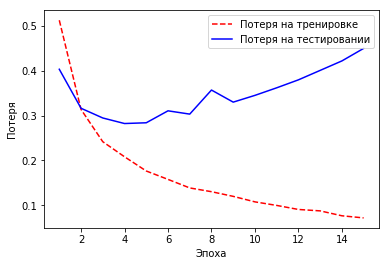

In [15]:
#визуализировать историю потери
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Потеря на тренировке", "Потеря на тестировании"])
plt.xlabel("Эпоха")
plt.ylabel("Потеря")
plt.show()

В качестве альтернативы можно использовать тот же самый подход для визуализации точности на тренировочных и на тестовых данных по каждой эпохе:

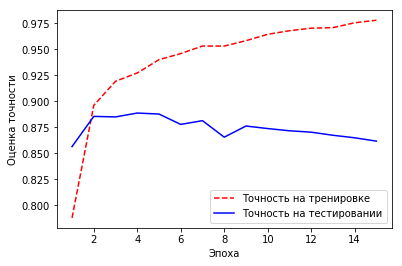

In [17]:
#получить истории точности на тренировочных и тестовых данных
training_accuracy = history.history ["acc"]
test_accuracy = history.history ["val_acc"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Точность на тренировке", "Точность на тестировании"])
plt.xlabel("Эпоха")
plt.ylabel("Оценка точности")
plt.show()

В самом начале наша нейронная сеть будет иметь низкую результативность.

По мере того, как нейронная сеть учится на тренировочных данных, модельная ошибка как на тренировочном, так и на тестовом наборе  будет стремиться  к увеличению.

Однако в определенный момент нейронная сеть начинает "запоминать" тренировочные данные , и наступает ее переподгонка, т е модель начинает слишком плотно прилегать к данным.

Когда это начинает происходить, ошибка на тренировочных данных будет уменьшаться, а ошибка на тестовых данных начинает увеличиваться.

Поэтому во многих случаях существует "золотая середина", где ошибка на тестовых данных ( т е ошибка, которая нас интересует  обычно в первую очередь) находится в самой низкой точке.

Этот эффект можно ясно увидеть в решении, где мы визуализируем потерю на тренировочных данных и потерю на тестовых данных в каждой эпохе.

Обратите внимание, что на первом графике ошибка на тестовых данных является самой низкой около пятой эпохи, после чего потеря на тренировочных данных  продолжает уменьшаться, в то время как потеря на тестовых данных начинает увеличиваться.

В этой точке происходит переподгонка модели.

# Снижение переподгонки с помощью регуляризации весов

Требуется снизить переподгонку.

Попробовать применить штраф к параметрам сети, так называемую регуляризацию весов:

In [1]:
#загрузить библиотеки
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import  models
from keras import layers
from keras import  regularizers

In [2]:
#задать начальное значение для генератора псевдослучайных чисел
np.random.seed(0)

In [3]:
#задать желаемое количество признаков
number_of_features = 10000

In [4]:
#загрузить данные и вектор из набора данных IMDB о кинофильмах
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

In [5]:
#конвертировать данные IMBD о кинофильмах 
#в матрицу признаков в кодировке с одним активным состоянием
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [6]:
#инициализировать нейронную сеть
network = models.Sequential()

In [7]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=16,
    activation="relu",
    kernel_regularizer=regularizers.l2(0.01),
    input_shape=(number_of_features,)
)) 

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=16,
    kernel_regularizer=regularizers.l2(0.01),
    activation="relu"
)) 

In [10]:
#добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(
    units=1,
    activation="sigmoid"
)) 

In [11]:
#скомпилировать нейронную сеть
network.compile(
    loss="binary_crossentropy", #перекрестная энтропия
    optimizer="rmsprop", #распространение среднеквадратичной ошибки
    metrics=["accuracy"] #точностный показатель результтивности
)

In [12]:
#натренировать нейронную сеть
history = network.fit(
    features_train, #признаки
    target_train,  #вектор целей
    epochs=3,  #количество эпох
    verbose=0, #печатать описание после каждой эпохи
    batch_size=100,  #количество наблюдений на пакет
    validation_data=(features_test, target_test) #тестовые данные
)

Instructions for updating:
Use tf.cast instead.


In [13]:
#предсказать классы тестового набора
predicted_target = network.predict(features_test)
predicted_target

array([[0.13487378],
       [0.98444957],
       [0.5515318 ],
       ...,
       [0.07717991],
       [0.08511153],
       [0.30163443]], dtype=float32)

Одна из стратегий борьбы с переподгонкой нейронных сетей заключается в наложении штрафа на параметры ( т е веса) нейронной сети таким образом, чтобы они сводилиль к малым значениям - создавая более простую модель, менее склонную к переподгонке.

Этот метод называется регуляризацией весов или снижением весов.

Если быть конкретнее, в регуляризации весов штраф, такой как норма L^2, добавляется к функции потери.

В библиотеке Keras можно добавить регуляризацию весов, включив в параметры слоя использование kernel_regularizer=regularizers.l2(0.01).

В этом примере значение 0.01 определяет, насколько мы штрафуем более высокие значения параметров.

# Снижение переподгонки с помощью ранней остановки

Требуется снизить переподгонку.

Попробовать остановить тренировку, когда потеря на тестовых данных перестанет уменьшаться, такая стратегия называется ранней остановкой.

In [23]:
#загрузить библиотеки
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import  models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [24]:
#задать начальное значение для генератора псевдослучайных чисел
np.random.seed(0)

In [25]:
#задать желаемое количество признаков
number_of_features = 1000

In [26]:
#загрузить данные и вектор из набора данных IMDB о кинофильмах
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

In [30]:
#конвертировать данные IMBD о кинофильмах 
#в матрицу признаков в кодировке с одним активным состоянием
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [31]:
#инициализировать нейронную сеть
network = models.Sequential()

In [32]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=16,
    activation="relu",
    input_shape=(number_of_features,)
)) 

In [33]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=16,
    activation="relu"
)) 

In [34]:
#добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(
    units=1,
    activation="sigmoid"
)) 

In [35]:
#скомпилировать нейронную сеть
network.compile(
    loss="binary_crossentropy", #перекрестная энтропия
    optimizer="rmsprop", #распространение среднеквадратичной ошибки
    metrics=["accuracy"] #точностный показатель результтивности
)

In [36]:
#Задать функции обратного вызова для ранней остановки тренировки 
#и сохоанения наилучшей достигнутой модели
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
            ModelCheckpoint(filepath="best_model.h5",
                           monitor="val_loss",
                           save_best_only=True)]

In [38]:
#натренировать нейронную сеть
history = network.fit(
    features_train, #признаки
    target_train,  #вектор целей
    epochs=20,  #количество эпох
    callbacks=callbacks, #ранняя остановка
    verbose=0, #печатать описание после каждой эпохи
    batch_size=100,  #количество наблюдений на пакет
    validation_data=(features_test, target_test) #тестовые данные
)

In [39]:
#предсказать классы тестового набора
predicted_target = network.predict(features_test)
predicted_target

array([[0.1355733 ],
       [0.9996947 ],
       [0.476774  ],
       ...,
       [0.13322079],
       [0.09599638],
       [0.4036549 ]], dtype=float32)

Как мы отмечали в рецепте "Визуализация истории процесса тренировки", обычно в первые тренировочные эпохи ошибки на тренировочных данных  и ошибки на тестовых данных  будут уменьшаться, но в какой-то момент сеть начинает "запоминать" тренировочные данные, в результате чего ошибка на тренировочных данных будет продолжать уменьшаться  даже тогда, когда ошибка на тестовых данных начнет увеличиваться.

Это явление называется переподгонкой, и одним из наиболее распространенных и очень эффективных методов противодействия переподгонке является отслеживание тренировочного процесса и его остановка, когда ошибка на тестовых данных начинает увеличиваться. Эта стратегия называется ранней остановкой.

В библиотеке Keras можно реализовать раннюю остановку в качестве функции обратного вызова. 

Обратные вызовы - это функции, которые могут быть применены на определенных этапах тренировочного процесса, например, в конце каждой эпохи.

В частности, в нашем решении мы включили EarlyStopping(monitor='val_loss', patience=2), чтобы указать, что мы хотим отслеживать потерю на тестовых данных в каждую эпоху, и после того, как потеря на тестовых данных не улучшается на протяжении двух эпох, тренировка прерывается.

Вместе с тем, поскольку мы установили patience=2, мы не получим наилучшую модель, это будет модель на две эпохи после наилучшей модели.

Поэтому, дополнительно, мы можем включить вторую операцию ModelCheckpoint, которая сохраняет модель в файл после каждой контрольной точки (что может быть полезно в случае, если по какой-либо причине многодневная тренировка прерывается). 

Будет полезно установить параметр save_best_only=True, потому что тогда класс ModelCheckpoint сохранит только лучшую модель.

# Снижение переподгонки с помощью отсева

Требуется уменьшить переподгонку.

Внести шумовую компоненту в сетевую архитектуру с помощью отсева:

In [40]:
#загрузить библиотеки
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import  models
from keras import layers

In [41]:
#задать начальное значение для генератора псевдослучайных чисел
np.random.seed(0)

In [42]:
#задать желаемое количество признаков
number_of_features = 1000

In [43]:
#загрузить данные и вектор из набора данных IMDB о кинофильмах
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

In [44]:
#конвертировать данные IMBD о кинофильмах 
#в матрицу признаков в кодировке с одним активным состоянием
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [45]:
#инициализировать нейронную сеть
network = models.Sequential()

In [46]:
#добавить отсеивающий слой для входного слоя
network.add(layers.Dropout(0.2, input_shape=(number_of_features,))) 

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [47]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=16,
    activation="relu"
)) 

In [48]:
#добавить отсеивающий слой для предыдущего скрытого слоя
network.add(layers.Dropout(0.5)) 

In [49]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=16,
    activation="relu"
)) 

In [50]:
#добавить отсеивающий слой для предыдущего скрытого слоя
network.add(layers.Dropout(0.5)) 

In [51]:
#добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(
    units=1,
    activation="sigmoid"
)) 

In [52]:
#скомпилировать нейронную сеть
network.compile(
    loss="binary_crossentropy", #перекрестная энтропия
    optimizer="rmsprop", #распространение среднеквадратичной ошибки
    metrics=["accuracy"] #точностный показатель результтивности
)

In [53]:
#натренировать нейронную сеть
history = network.fit(
    features_train, #признаки
    target_train,  #вектор целей
    epochs=3,  #количество эпох
    verbose=0, #печатать описание после каждой эпохи
    batch_size=100,  #количество наблюдений на пакет
    validation_data=(features_test, target_test) #тестовые данные
)

In [54]:
#предсказать классы тестового набора
predicted_target = network.predict(features_test)
predicted_target

array([[0.26031694],
       [0.9932928 ],
       [0.63545775],
       ...,
       [0.18084115],
       [0.22743541],
       [0.4217641 ]], dtype=float32)

Отсев, или прореживание, является популярным и мощным методом регуляризации нейронных сетй. В случае отсева каждый раз, когда создается пакет наблюдений для тренировки, доля блоков  в одном или нескольких слоях умножается на ноль ( т е сбрасывается). 

В этих условиях каждый пакет тренируется на той же сети (например, на одних и тех же параметрах), но каждый пакет сталкивается с немного другой версией архитектуры этой сети.

Отсев эффективен тем, что за счет постоянного и случайного обнуления блоков в каждом пакете он принуждает блоки заучивать значения параметров, способные  хорошо работать  в условиях большого разнообразия сетевых архитектур.

То есть, они учатся быть устойчивыми к повреждениям ( т е шуму) в других скрытых блоках, и это не дает сети просто механически запоминать тренировочные данные.

Отсев можно добавлять и в скрытые, и во входные слои.

Когда сбрасывается входной слой, его значение признака не вводится в сеть для конкретного пакета.

Общепринято выбирать долю отсеиваемых блоков  в размере 0.2 для входных блоков и 0.5 для скрытых блоков.

В библиотеке Keras можно реализовать отсев, добавив в нашу сетевую архитектуру отсеивающие слои Dropout.

Каждый слой Dropout будет отсеивать заданный пользователем гиперпараметр блоков в предыдущем слое каждого пакета.

Напомним, что в библиотеке Keras  входной слой считается первым слоем и не добавляется с помощью метода add.

Поэтому, если мы хотим добавить отсев во входной слой, то первым слоем, который мы добавим  в нашу сетевую архитектуру, будет отсеивающий слой.

Этот слой содержит долю блоков  входного слоя, подлежащих отсеву 0.2, и параметр input_shape, определяющий форму данных наблюдений.

Затем после каждого скрытого слоя  мы добавляем отсеивающий слой с долей 0.5.

# Сохранение процесса тренировки модели

Дана нейронная сеть, на тренировку которой уходит много времени, и требуется возможность сохранить ход выполнения в случае, если процесс тренировки будет прерван.

Использовать функцию обратного вызова, реализованную классом ModelCheckpoint
библиотеки Keras, чтобы записывать модель на диск после каждой эпохи.

In [1]:
#загрузить библиотеки
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import  models
from keras import layers
from keras.callbacks import ModelCheckpoint

In [2]:
#задать начальное значение для генератора псевдослучайных чисел
np.random.seed(0)

In [3]:
#задать желаемое количество признаков
number_of_features = 1000

In [4]:
#загрузить данные и вектор из набора данных IMDB о кинофильмах
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

In [5]:
#конвертировать данные IMBD о кинофильмах 
#в матрицу признаков в кодировке с одним активным состоянием
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [6]:
#инициализировать нейронную сеть
network = models.Sequential()

In [7]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=16,
    activation="relu",
    input_shape=(number_of_features,)
)) 

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=16,
    activation="relu"
)) 

In [9]:
#добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(
    units=1,
    activation="sigmoid"
)) 

In [10]:
#скомпилировать нейронную сеть
network.compile(
    loss="binary_crossentropy", #перекрестная энтропия
    optimizer="rmsprop", #распространение среднеквадратичной ошибки
    metrics=["accuracy"] #точностный показатель результтивности
)

In [11]:
#задать функции обратного вызова для ранней остановки тренировки
#и сохранения наилучшей достигнутой модели
checkpoint = [ModelCheckpoint(filepath="models.hdf5")]

In [12]:
#натренировать нейронную сеть
history = network.fit(
    features_train, #признаки
    target_train,  #вектор целей
    epochs=3,  #количество эпох
    callbacks=checkpoint, #контрольная точка
    verbose=0, #печатать описание после каждой эпохи
    batch_size=100,  #количество наблюдений на пакет
    validation_data=(features_test, target_test) #тестовые данные
)

Instructions for updating:
Use tf.cast instead.


In [13]:
#предсказать классы тестового набора
predicted_target = network.predict(features_test)
predicted_target

array([[0.25582272],
       [0.99826944],
       [0.5497246 ],
       ...,
       [0.12513116],
       [0.09407932],
       [0.4957164 ]], dtype=float32)

В рецепте "Снижение переподгонки с помощью регуляризации весов" мы использовали функцию обратного вызова, реализованную в классе ModelCheckpoint, в сочетании с ранней установкой EarlyStopping для завершения отслеживания и тренировки, когда ошибка на тестовых данных перестала улучшаться.

Вместе с тем есть еще одна причина для использования класса ModelCheckpoint.

В реальном мире нейронные сети тренируются часами и даже днями.

За это время многое может пойти не так: компьютеры могут потерять питание, серверы могут рухнуть, или невримательные аспиранты могут закрыть ваш нотбук.

Класс ModelCheckpoint устраняет эту проблему, сохраняя модель после каждой эпохи.

В частности после каждой эпохи класс ModelCheckpoint сохраняет модель в расположение, указонное параметром filepath.

Если мы включаем только имя файла(например, models.hdf5), этот файл будет перезаписан последней моделью каждой эпохи.

Если требуется сохранить только лучшую модель в соответствии с результативностью некоторой функции потерь, то можно установить save_best_only=True и monitor ='val_loss', чтобы не перезаписывать файл, если модель имеет худшую потерю на тестовых данных, чем предыдущая модель.

В качестве альтернативы можно сохранить модель каждой эпохи в отдельный файл, включив номер эпохи и оценку потери на тестовых данных в само имя файла.

Например, если для параметра filepath задать значение 

model_{epoch:02d}_{val_loss:.2.f}.hdf5, 

то имя файла содержащего модель, сохраненную после 11 эпохи со значением потери на тестовых данных 0.33, будет 

model_10_0.35.hdf5 

(номер эпохи индексируется с отсчетом от 0).

# k-блочная перекрестная проверка нейронных сетей

Требуется оценить нейронную сеть, используя k-блочную перекрестную проверку.

Часто k-блочная перекрестная проверка нейронных сетей не является ни необходимой, ни целесообразной.

Однако, если это необходимо, следует использовать оболочку библиотеки Keras для scikit-learn, чтобы позволить последовательным моделям Keras  применять API библиотеки scikit-learn:

In [14]:
#загрузить библиотеки
import numpy as np
from keras import  models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

In [15]:
#задать начальное значение для генератора псевдослучайных чисел
np.random.seed(0)

In [17]:
#задать желаемое количество признаков
number_of_features = 100

In [20]:
#сгенерировать матрицу признаков и вектор целей
features, target = make_classification(
    n_samples=10000,
    n_features=number_of_features,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    weights=[.5,.5],
    random_state=0
)

In [21]:
#создать функцию, возвращающую скомпилированную сеть
def create_network():
    #инициализировать нейронную сеть
    network = models.Sequential()
    
    #добавить полносвязный слой с активационной функцией ReLU
    network.add(layers.Dense(
        units=16,
        activation="relu",
        input_shape=(number_of_features,)
    )) 
    
    #добавить полносвязный слой с активационной функцией ReLU
    network.add(layers.Dense(
        units=16,
        activation="relu"
    )) 
    
    #добавить полносвязный слой с сигмоидальной активационной функцией
    network.add(layers.Dense(
        units=1,
        activation="sigmoid"
    ))
    
    #скомпилировать нейронную сеть
    network.compile(
        loss="binary_crossentropy", #перекрестная энтропия
        optimizer="rmsprop", #распространение среднеквадратичной ошибки
        metrics=["accuracy"] #точностный показатель результтивности
    )
    return network

In [23]:
#обернуть модель Keras, чтобы она могла 
#использоваться библиотекой scikit-learn
neural_network = KerasClassifier(build_fn=create_network,
                                epochs=10,
                                batch_size=100,
                                verbose=0)

In [26]:
#оценить нейронную сеть с помощью трехблочной перекрестной проверки
cross_val_score(neural_network, features, target, cv=3)

array([0.91361728, 0.90819082, 0.87038704])

Теоритически нет причин, по которым мы не можем применять перекрестную проверку для оценивания нейронных сетей.

Вместе с тем нейронные сети часто используются для очень крупных данных, и на их тренировку может уходить несколько часов или даже дней.

По этой причине, если время тренировки длинное, добавление вычислительных расходов за счет k-блочной перекрестной проверки нецелесообразно.

Например, оценивание модели, на тренировку которой обычно требуется 1 день, с использованием 10-блочной перекрестной проверки уйдет 10 дней.

Если имеются крупные данные, то часто целесообразно оценить нейронную сеть просто на некотором тестовом наборе.

Если имеются данные меньшего объема, то k-блочная перекрестная проверка может быть полезна  с целью максимизировать нашу способность оценивать результативность нейронной сети.

В библиотеке Keras это возможно, потому, что мы можем "обернуть" любую нейронную сеть таким образом, чтобы она могла использовать оценивающие функции , доступные в библиотеке scikit-learn, включая k-блочную перекрестную проверку.

Для этого сначала нужно создать функцию, которая возвращает скомпилированную нейронную сеть.

Затем для обертки модели мы применяем класс KerasClassifier (если у нас классификатор, если же у нас регрессор, то можно выбрать класс Keras Regressor), чтобы она могла использоваться библиотекой scikit-learn.

После этого мы можем использовать нашу нейронную сеть, как и любой другой обучающий алгоритм библиотеки scikit-learn (например, случайные леса, логистическая регрессия).

В нашем решении, чтобы выполнить трехблочную перекрестную проверку на нашей нейронной сети, мы вызвали метод cross_val_score.


# Тонкая настройка нейронных сетей

Требуется автоматически отобрать наилучшие гиперпараметры для вашей нейронной сети.

Объединить нейронную сеть библиотеки Keras с инструментами отбора модели библиотеки scikit-learn, такими как класс GridSearchCV, реализующий поиск по решетке параметров с перекрестной проверкой: 

In [1]:
#загрузить библиотеки
import numpy as np
from keras import  models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

Using TensorFlow backend.
C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
#задать начальное значение для генератора псевдослучайных чисел
np.random.seed(0)

In [3]:
#задать желаемое количество признаков
number_of_features = 100

In [4]:
#сгенерировать матрицу признаков и вектор целей
features, target = make_classification(
    n_samples=10000,
    n_features=number_of_features,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    weights=[.5,.5],
    random_state=0
)

In [5]:
#создать функцию, возвращающую скомпилированную сеть
def create_network(optimizer="rmsprop"):
    #инициализировать нейронную сеть
    network = models.Sequential()
    
    #добавить полносвязный слой с активационной функцией ReLU
    network.add(layers.Dense(
        units=16,
        activation="relu",
        input_shape=(number_of_features,)
    )) 
    
    #добавить полносвязный слой с активационной функцией ReLU
    network.add(layers.Dense(
        units=16,
        activation="relu"
    )) 
    
    #добавить полносвязный слой с сигмоидальной активационной функцией
    network.add(layers.Dense(
        units=1,
        activation="sigmoid"
    ))
    
    #скомпилировать нейронную сеть
    network.compile(
        loss="binary_crossentropy", #перекрестная энтропия
        optimizer=optimizer, #распространение среднеквадратичной ошибки
        metrics=["accuracy"] #точностный показатель результтивности
    )
    return network

In [6]:
#обернуть модель Keras, чтобы она могла 
#использоваться библиотекой scikit-learn
neural_network = KerasClassifier(build_fn=create_network, verbose=0)

In [7]:
#создать гиперпараметрическое пространство
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]

In [8]:
#создать словарь вариантов гиперпараметров
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

In [9]:
hyperparameters

{'optimizer': ['rmsprop', 'adam'],
 'epochs': [5, 10],
 'batch_size': [5, 10, 100]}

In [10]:
#создать объект решеточного поиска
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)

In [12]:
#выполнить подгонку объекта решеточного поиска
grid_result = grid.fit(features, target)

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Instructions for updating:
Use tf.cast instead.


Ранее мы рассмотрели методы отбора модели, которые идентифицируют наилучшие гиперпараметры модели scikit-learn.

Ранее мы узнали, что можем обернуть нейронную сеть, чтобы она могла использовать API библиотеки scikit-learn.

В этом рецепте мы совмещаем эти два метода, чтобы идентифицировать наилучшие гиперпараметры нейронной сети.

Гиперпараметры модели очень важны и должны тщательно отбираться.
Однако если на тренировку модели уходит 12 часов, то процесс решеточного поиска может занять неделю или больше.

Поэтому автоматическая гиперпараметрическая настройка нейронных сетей не является серебрянной пулей, но при определенных обстоятельствах это полезный инструмент.

В нашем решении мы провели перекрестно-проверочный решеточный поиск по ряду вариантов оптимизационного алгоритма, количеству эпох и размеру пакета.

Даже этот игрушечный пример занял несколько минут, но после того, как он будет завершен, для просмотра гиперпараметров нейронной сети с наилучшими результатами можно воспользоваться атрибутом: best_params_

In [13]:
#взглянуть на гиперпараметры наилучшей нейронной сети
grid_result.best_params_

{'batch_size': 10, 'epochs': 5, 'optimizer': 'adam'}

# Визуализация нейронных сетей

Требуется быстро визуализировать архитектуру нейронной сети.

Использовать функции model_to_dot либо plot_model библиотеки Keras.

In [23]:
import keras
from keras import  models
from keras import layers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import pydot as pyd
keras.utils.vis_utils.pydot = pyd

In [16]:
#инициализировать нейронную сеть
network = models.Sequential()

In [17]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,))) 

In [18]:
#добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu")) 
    
#добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(units=1, activation="sigmoid"))
    

In [20]:
!pip install pydot

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


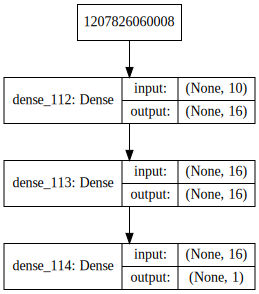

In [24]:
#визуализировать сетевую архитектуру
SVG(model_to_dot(network, show_shapes=True).create(prog="dot", format="svg"))

В качестве альтернативы, если мы хотим сохранить визуализацию в виде файла, можно применить функцию plot_model:

In [25]:
#сохранить визуализацию в виде файла
plot_model(network, show_shapes=True, to_file="network.png")

Библиотека Keras предоставляет полезные функции для быстрой визуализации нейронных сетей.

Если требуется отобразить нейронную сеть в блокноте Jupyter, то можно использовать функцию model_to_dot.

Параметр show_shapes показывает форму входных и выходных данных и может помочь при отладке. 

Для более простой модели можно задать show_shapes=True:

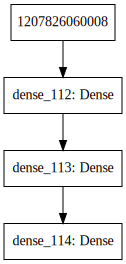

In [26]:
#Визуализировать сетевую архитектуру
SVG(model_to_dot(network, show_shapes=False).create(prog="dot", format="svg"))

# Классификация изображений

Требуется расклассифицировать изображения с помощью сверточной нейронной сети.

Использовать библиотеку Keras для создания нейронной сети с хотя бы одним сверточным слоем:

In [1]:
#загрузить библиотеки
import numpy as np
from keras.datasets import mnist
from keras.models import  Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [2]:
#сделать значение цветового канала первым
K.set_image_data_format("channels_first")

In [3]:
#задать начальное значение для генератора псевдослучайных чисел
np.random.seed(0)

In [4]:
#задать информацию об изображении
channels = 1
height = 28
width = 28

In [5]:
#загрузить данные и цель из набора данных MNIST рукописных цифр
(data_train, target_train), (data_test, target_test) = mnist.load_data()

In [6]:
data_train.shape

(60000, 28, 28)

In [7]:
#реформировать тренировочные данные об изображениях в признаки
data_train = data_train.reshape(data_train.shape[0], channels, height, width)

In [8]:
data_train.shape

(60000, 1, 28, 28)

In [9]:
#реформировать тестовые данные об изображениях в признаки
data_test = data_test.reshape(data_test.shape[0], channels, height, width)

In [10]:
#прошкалировать пиксельную интенсивность в диапазон между 0 и 1
features_train = data_train/255 
features_test = data_test/255 

In [11]:
#преобразовать цель в кодировку с одним активным состоянием
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

https://keras.io/utils/

In [12]:
#инициализировать нейронную сеть
network = Sequential()

In [13]:
#добавить сверточный слой с 64 фильтрами, окном 5 x 5 
#и активационной функцией ReLU
network.add(Conv2D(filters=64,
                  kernel_size=(5, 5),
                  input_shape=(channels, width, height),
                  activation='relu'))
#добавить максимально редуцирующий слой с окном 2 x 2
network.add(MaxPooling2D(pool_size=(2, 2)))
#добавить отсейвающий слой
network.add(Dropout(0.5))
#добавить слой для сглаживания входа
network.add(Flatten())
#добавить полносвязный слой из 128 блоков
#с активационной функцией ReLU
network.add(Dense(128, activation="relu"))
#добавить отсейвающий слой
network.add(Dropout(0.5))
#добавить полносвязный слой 
#с активационной функцией softmax
network.add(Dense(number_of_classes, activation="softmax"))

#скомпилировать нейронную сеть
network.compile(loss="categorical_crossentropy", #перекрестная энтропия
               optimizer="rmsprop",   #распространение СКО
               metrics=["accuracy"]) #точностный показатель результативности

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 24, 24)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 12, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 12, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [15]:
features_train.shape

(60000, 1, 28, 28)

In [16]:
#Натренировать нейронную сеть 
network.fit(features_train, #признаки
            target_train, #цель
            epochs=2,
            verbose=0,
            batch_size=1000,
            validation_data=(features_test, target_test) #данные для оценивания
           )

Instructions for updating:
Use tf.cast instead.


In [18]:
network.predict(features_test)

array([[2.21119103e-06, 2.09670148e-07, 2.82810535e-04, ...,
        9.99657750e-01, 5.22023015e-07, 2.29625202e-05],
       [9.33349020e-06, 1.73850840e-05, 9.99922752e-01, ...,
        6.27273433e-09, 1.40784796e-05, 4.33472369e-09],
       [1.10353554e-04, 9.97480690e-01, 8.56693427e-04, ...,
        5.09220874e-04, 4.30491200e-04, 2.03748077e-05],
       ...,
       [1.50079131e-06, 1.82408003e-05, 4.06236722e-06, ...,
        2.14683852e-04, 2.68510194e-04, 1.64465257e-03],
       [5.56514124e-06, 1.77294169e-05, 2.45481738e-06, ...,
        2.75326124e-06, 4.60001873e-03, 1.05303498e-05],
       [9.38080302e-06, 7.93777190e-07, 2.07485777e-04, ...,
        4.36637038e-08, 6.42371788e-07, 9.38063280e-08]], dtype=float32)

Сверточные нейронные сети (так называемые ConvNet- сети) - это популярный тип сети, который доказал свою очень высокую эффективность в компьютерном зрении (распознавание объектов).

Нейронные сети прямого распространения вполне можно использовать на изображениях, где каждый пиксел является признаком.

Однако при этом мы сталкиваемся с 2 -мя основными проблемами.

Во-первых, нейронные сети прямого распространения не учитывают пространственную структуру пикселов.

Например, изображение 10 x 10  пикселов можно преобазовать в вектор из 100 пикселов, и в этом случае сеть прямого распространения будет считать, что первый признак (например, значение пиксела) имеет ту же связь, с 10 признаком, что и с 11 признаком.

Однако на самом деле 10-й признак представляет пиксел на дальней стороне как первый признак, в то время как 11-й признак представляет пиксел непосредственно под первым пикселом.

Во-вторых, и в связи с этим, нейронные сети прямого распространения вместо локальных шаблонов заучивают глобальные связи в признаках.

С практической точки зрения, это означает что нейронные сети прямого распространения не способны обнаруживать объект независимо от того, где он появляется на изображении.

Например, представьте, что мы тренируем нейронную сеть распознавать лица,  и эти лица могут появляться на изображении в любом месте - от правого верхнего участка до левого среднего до нижнего.

Сила сверточных нейронных сетей заключается в их способности справляться с обеими проблемами (и другими).

Данные отдельного изображения содержат две или три размерности: высоту, ширину, глубину.

Глубина - это цвет пиксела.

В полутоновых изображениях глубина всего одна (интенсивность пиксела) и поэтому изображение представлено матрицей.

Однако в цветных изображениях цвет пиксела представлен несколькими значениями.

Например, в изображении RGB  цвет пиксела представен 3-мя значениями, обозначающими красный, зеленый, синий цвета.

Поэтому данные для изображения можно представить как трехмерный тензор: ширина*высота*глубина(называемые картами признаков).

В сверточных нейронных сетях свертку можно представить, как скользящее окно над пикселами изображения, охватывающее и отдельный пиксел, и его соседей.

Затем она преобразовывает сырые данные  изображения в новый трехмерный тензор, где первые две размерности имеют приблизительно ширину и высоту. в то время как третья размерность (которая содержала значения цвета) теперь представляет шаблоны, называемые фильтрами - например, острый угол и широкий градиент), к которому "принадлежит" этот пиксел.

Вторая важная идея для наших целей - это редуцирующие слои.

Редуцирующие слои перемещают окно над нашими данными(хотя обычно они смотрят  с интервалами только на каждый n -ый пиксел, это называется перемещением с шагом) и уменьшают размер наших данных, тем или иным образом подитоживая окно.

Наиболее распространенным методом чвляется максимальное редуцирование, при котором на следующий уровень отправляется максимальное значение в каждом окне.

Одна их причин для максимального редуцирования носит чисто практический характер; сверточный процесс создает черезвычайно много параметров для заучивания, которые очень быстро могут стать громоздкими. Вторая причина интуитивно понятнее: максимальное редуцирование можно рассматривать как "уменьшение масштаба" изображения.

Пример. Представьте, что у вас есть изображение, содержащее морду собаки. Первый сверточный слой может найти шаблоны, такие как края фигуры. Затем мы используем максимально редуцирующий слой для "уменьшения масштаба"  и второй сверточный слой для поиска шаблонов, таких как собачьи уши. наконец. мы используем еще один максимально редуцирующий слой, чтобы снова уменьшить масштаб, и заключительный сверточный слой, чтобы найти шаблоны, такие как морды собак.

Наконец, полносвязные слои часто используются к конце сети для классификации.

Хотя наше решение может выглядеть, как целая куча строк кода, оно на самом деле очень похоже на наш бинарный классификатор из более раней главы. В этом решении мы использовали знаменитый набор данных MNIST, который в машинном самообучении фактически является эталонным набором данных.

Набор данных MNIST содержит 70 000 небольших изображений (28 x 28) рукописных цифр от 0 до 9.

Этот набор данных помечен, чтобы мы знали фактическую цифру ( т е класс) каждого небольшого изображения.

Стандартное разбиение тренировка-тестирование в использовании 60 000 изображений для тренировки и 10 000 для тестирования.

Мы реорганизовали данные в формат, ожидаемой сверточной сетью. В частности, мы использовали метод reshape, чтобы преобразовать данные наблюдений в ту форму, которую ожидает библиотека Keras. Затем мы прошкалировали значения, приведя их к диапазону между 0 и 1, т к результативность тренировки может пострадать, если значения наблюдения будут намного больше, чем параметры сети(которые инициализируются как малые числа).

Наконец, мы преобразовали целевые данные в кодировку с одним активным состоянием, чтобы каждая цель наблюдения имела 10 классов, представляющих цифры 0-9.

Благодаря указанной предобработке даннных изображения мы можем построить нашу сверточную сеть. Сначала мы добавляем сверточный слой и задаем количество фильтров и другие характеристики.

Размерр окна является гиперпараметром. Однако размер 3 x 3 является стандартной практикой для большинства изображений, тогда как большие окна часто используются в больших изображениях.

Во-вторых мы добавляем максимально редуцирующий слой, подитожывая окрестные пикселы.

В-третьих мы добавляем отсеивающий слой, чтобы уменьшить вероятность переподгонки модели.

В-четвертых, мы добавляем сглаживающий слой для преобразования входов  в формат, который может быть использован полносвязным слоем.

Наконец, мы добавляем полносвязные слои и выходной слой, который выполняет фактическую классификацию.

Обратите внимание, что поскольку эта задача мультиклассовой классификации, мы в выходном слое используем активационную функцию softmax.

Это довольно простая сверточная нейронная сеть. Часто можно увидеть гараздо более глубокую сеть с гораздо большим количеством сверточных и максимально редуцирующих слоев, уложенных в ярусы.

# Улучшение результативности с помощью расширения изображения

Требуется улучшить производительность сверточной нейронной сети.

Для получения более оптимальных результатов предварительно обработать изображения и расширить (аргументировать, "раздуть") данные с помощью класса-генератора ImageDataGenerator.

In [19]:
#загрузить библиотеку
from keras.preprocessing.image import ImageDataGenerator

In [20]:
#создать объект расширения изображения
augmentation = ImageDataGenerator(featurewise_center=True, #применить отбеливание ZCA
                                 zoom_range=0.3, #случайно приблизить изображения
                                 width_shift_range=0.2, #случайно сместить изображения
                                 horizontal_flip=True, #случайно перевернуть изображения
                                 rotation_range=90) #случайно повернуть изображения

Отбеливающее преобразование или сферическое преобразование - это линейное преобразование, которое преобразует вектор случайных величин с известной ковариационной матрицей в набор новых переменных, чья ковариация является единичной матрицей, что означает, что они некоррелированы и имеют дисперсию 1. 

Преобразование называется «отбеливанием», поскольку оно превращает входной вектор в вектор белого шума.

Несколько других преобразований тесно связаны с отбеливанием:

преобразование декорреляции удаляет только корреляции, но оставляет отклонения нетронутыми, преобразование стандартизации устанавливает отклонения в 1, но оставляет корреляции нетронутыми, преобразование раскраски преобразует вектор белых случайных величин в случайный вектор с заданной ковариационной матрицей.

https://en.wikipedia.org/wiki/Whitening_transformation

https://keras.io/preprocessing/image/

In [ ]:
#rescale = 1./255
#провести масштабирование картинки

In [ ]:
#обработать все изображения
augment_images = augmentation.flow_from_directory("raw/images", #папка с изображениями
                                                  batch_size=32, #размер пакета
                                                  class_mode="binary" #классы
                                                  save_to_dir="processed/images"
                                                  )

Программный код этого решения у вас сразу не заработает, потому что у вас нет необходимых папок изображений. Вместе с тем наиболее распространенной ситуацией является наличие каталога изображений, и поэтому данный пример сюда был включен. Этот прием должен легко транслироваться на ваши собственные данные изображения.

Один из способов повышения результативности сверточнй нейронной сети состоит в предобработке изображений. 

Мы обсудили ряд таких методов в главе "Работа с изображениями", однако стоит отметить, что класс ImageDataGenerator библиотеки Keras содержит ряд базовых методов предобработки.

Например, в нашем решении мы использовали fearurewise_center=True для стандартизации пикселов по всем графическим данным.

Во время тренировки сверточный нейронных сетей для коллекции изображений в наблюдения можно добавлять шум путем случайного преобразования изображений различными способами, такими как переворот или увеличение изображений.

Результативность модели могут заметно улучшить  даже небольшие изменения.

Для проведения этих преобразований можно использовать  тот же самый класс:
ImageDataGenerator.

В документации Keras указан полный список доступных преобразований.

Однако в нашем примере приведен пример таких преобразований, как случайное увеличение, сдвиг, переворот и поворот изображения.

Важно отметить, что результатом метода flow_from_directory является объект-генератор Python.

Это вызвано тем, что в большинстве случает возникает необходимость обрабатывать изображения по требованию, когда они отправляются в нейронную сеть для тренировки.

Если бы требовалось обработать все изображения сразу до начала тренировки, то мы могли бы просто обойти генератор в цикле.

Наконец, поскольку параметр augment_images является генератором, вместо метода fit во время тренировки нашей нейронной сети придется использовать метод fit_generator. Например, 

In [ ]:
#Натренировать нейронную сеть
network.fit_generator(augment_images,
                      step_per_epoch=2000, #количество вызовов генератора для каждой эпохи
                      epochs=5,  #количество эпох
                      validation_data=augment_images_test, #генератор тестовых данных
                      validation_steps=800  #количество вызовов генератора 
                      #для каждой тестовой эпохи)

# Классификация текста

Требуется классифицировать текст.

Использовать реуррентную нейронную сеть с долгой краткосрочной памятью.

In [2]:
#загрузить библиотеки
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import models
from keras import layers

In [3]:
#задать начальное значение для генератора псевдослучайных чисел
np.random.seed(0)

In [5]:
#задать желаемое количество признаков
number_of_features = 1000

In [6]:
#загрузить данные и вектор из набора данных IMDB о кинофильмах
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

In [7]:
#использовать дополнение и усечение,
#чтобы каждое наблюдение имело 400 признаков
features_train = sequence.pad_sequences(data_train, maxlen=400)
features_test = sequence.pad_sequences(data_test, maxlen=400)

In [8]:
#инициализировать нейронную сеть
network = models.Sequential()
    
#добавить встраивающий слой 
network.add(layers.Embedding(input_dim=number_of_features,output_dim=128)) 
    
#добавить  слой длинной краткосрочной памяти с 128 блоками
network.add(layers.LSTM(units=128)) 
    
#добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(
    units=1,
    activation="sigmoid"
))
    
#скомпилировать нейронную сеть
network.compile(loss="binary_crossentropy", #перекрестная энтропия
                optimizer="Adam", #оптимизация Адам
                metrics=["accuracy"] #точностный показатель результтивности
               )

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
#Натренировать нейронную сеть 
network.fit(features_train, #признаки
            target_train, #цель
            epochs=3,
            verbose=0,
            batch_size=1000,
            validation_data=(features_test, target_test) #данные для оценивания
           )

Instructions for updating:
Use tf.cast instead.


Часто возникает необходимость классифицировать текстовые данные.

Хотя для этого можно применить вид сверточной сети, мы сосредоточимся на более популярном варианте: рекуррентной нейронной сети.

Ключевой особенностью рекуррентных нейронных сетей является то, что информация в ней зациклена. Эта особенность позволяет рекурентным нейронным сетям иметь тип памяти , который они могуи использовать для лучшего понимания последовательных данных.

Популярным типом рекуррентной нейронной сети является сеть с долгой краткосрочной памятью (long short-term memory) или LSTM сеть, которая позволяет осуществлять обратное циркулирование информации в сети. 

В этом решении используются данные с отзывами о кинофильмах (ранее) и требуется натренировать LSTM сеть предсказывать, являются ли эти отзывы положительными или отрицательными. 

Прежде, чем мы сможем натренировать нашу сеть, требуется небольшая обработка данных. Наши текстовые данные поступают в виде списка целых чисел:

In [10]:
#взглянутть на первое наблюдение
print(data_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


Каждое целое число в этом списке соответствует некоторому слову. Однако, поскольку каждый отзыв в кинофильме содержит неодинаковое количество слов, каждое наблюдение имеет разную длинну.

Поэтому, прежде чем мы сможем ввести эти данные в нашу нейронную сеть, нам нужно сделать все наблюдения одинаковой длинны.

Мы можем сделать это с помощью метода pad_sequences, который дополняет все данные наблюдений таким образом, чтобы они были одинакового размера. 

Мы можем увидеть это, если посмотрим на первое наблюдение после его обработки методом pad_sequences:

In [11]:
print(features_test[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

Далее мы используем один из самых перспективных методов в обработке естественного языка: встраивание слов(word embedding).

В нашем двоичном классификаторе (ранее) мы преобразовали наблюдения в кодировку с одним активным состоянием и использовали их в качестве входов в нейронную сеть. 

Однако на этот раз мы представим каждое слово как вектор в многомерном пространстве  и дадим расстоянию между двумя векторами  представлять сходство между словами.

В библиотеке Keras это можно сделать, добавив встраивающий слой Embedding. 

Для каждого значения, отправленного в слой Embedding, он выведет вектор, представляющий это слово. 

Следующий слой - это наш слой LSTM с 128 блоками, который позволяет использовать информацию из более ранних входов в будущих, непосредственно обращаясь к последовательному характеру данных.

Наконец, поскольку перед нами задача бинарной классификации (каждый отзыв или положительный или отрицательный), мы добавляем полносвязный выходной слой  с одним блоком и сигмоидальной активационной функцией.

Следует отметить, что LSTM- сети представляют собой очень широкую тему и находятся в центре внимания многих исследователей.

Этот рецепт, хотя и будет полезен, далек от последнего слова в реализации LSTM сетей.